In [3]:
import matplotlib, cv2
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
import os
os.getcwd()

'C:\\Users\\edwar\\Computer Vision\\Coursework\\Task1Dataset\\angle'

# Trying different threshold values

In [9]:
img = cv2.imread('image1.png')
gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

min_thresh = 0.75*np.median(gray_img)
max_thresh = 1.25*np.median(gray_img)
print(f"Threshold 1 = {min_thresh}, Threshold 2 = {max_thresh}")

Threshold 1 = 38.25, Threshold 2 = 63.75


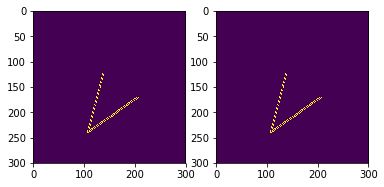

In [10]:
img = cv2.imread('image1.png')

line_edges = cv2.Canny(img, threshold1=38.25, threshold2=63.75) # 0.75 and 1.25 * median pixel
line_edges_2 = cv2.Canny(img, threshold1=10, threshold2=100) # Experiment

f, axarr = plt.subplots(1,2)
axarr[0].imshow(line_edges[0:300, 500:800])
axarr[1].imshow(line_edges_2[0:300, 500:800])

### Main Measure Angle Function

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def measure_angle(img_number):
    '''
    Coursework specific function, requires images in working directory saved as image1.png etc.
    
    Will return the calculated angle and number of detected lines.
    
    Will also save visualisation with calculated lines superimposed.
    '''
    
    # Step 1: Read the image as a grayscale image
    img = cv2.imread(f'image{img_number}.png')
    gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    ### Step 2: Canny & Hough Transform on Skeletonised image
    line_edges = cv2.Canny(gray_img, threshold1=38.25, threshold2=63.75)
    lines = cv2.HoughLines(line_edges, 1,np.pi/360,80)
    
    ### Step 3: Measure the angle and Create a visualisation of lines on top of original image
    for j in range(1, len(lines)):
        for rho,theta in lines[0]:
            theta_i = theta
            rho_i = rho
        for rho,theta in lines[j]:
            theta_j = theta
            rho_j = rho
        
        angle = max(theta_i, theta_j) - min(theta_i,theta_j)
        
        if rho_i < 0 or rho_j < 0: # if rho is negative for one of the two lines, we'll be calculating the wrong angle
            angle = np.pi - angle
        
        if angle > 0.04 and angle < np.pi - 0.04: # make sure that it's not picking out 2 lines that are parallel
            break
            
           
            
    img = cv2.imread(f'image{img_number}.png')
    for final_line in [0, j]:
        for rho,theta in lines[final_line]:
            a = np.cos(theta)
            b = np.sin(theta)
            x0 = a*rho
            y0 = b*rho
            x1 = int(x0 + 1000*(-b))
            y1 = int(y0 + 1000*(a))
            x2 = int(x0 - 1000*(-b))
            y2 = int(y0 - 1000*(a))
               
           
            cv2.line(img,(x1,y1),(x2,y2),(0,0,255),2)
    
    cv2.imwrite(f'houghlines{img_number}.jpg',img)
    plt.imshow(img)
    
    return 360*(angle/(2*np.pi)), lines

### Results

39.99999883637168 6
20.000001125733135 11
60.000001669652114 7
120.00000516053706 7
53.000008987916516 10
72.00000200358254 14
95.0000033264838 17
108.99999916260985 16
18.000000500895634 10
90.00000250447816 14


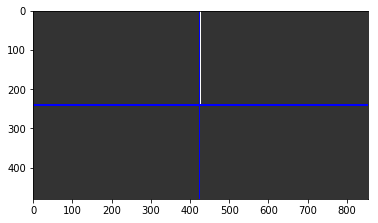

In [12]:
for i in range(1,11):
    angle, lines = measure_angle(i)
    
    print(angle, len(lines))

### With Skeletonisation

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def measure_angle(img_number):
    '''
    Coursework specific function, requires images in working directory saved as image1.png etc.
    
    Will return the calculated angle and number of detected lines.
    
    Will also save visualisation with calculated lines superimposed.
    '''
    
    
    ### Step 1: Skeletonise Image
    # Skeletonisation is probably not essential since top, bottom lines should be parallel anyway
    # but could be a good option to reduce down to two lines and improve quality of visualisation
    # https://medium.com/analytics-vidhya/skeletonization-in-python-using-opencv-b7fa16867331
    
    # Read the image as a grayscale image
    img = cv2.imread(f'image{img_number}.png')
    gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    # Threshold the image
    ret, img = cv2.threshold(gray_img, 127, 255, 0)
    
    # Step 1: Create an empty skeleton
    size = np.size(img)
    skel = np.zeros(img.shape, np.uint8)
    
    # Get a Cross Shaped Kernel
    element = cv2.getStructuringElement(cv2.MORPH_CROSS, (3,3))
    
    # Repeat steps 2-4
    while True:
        #Step 2: Open the image
        open = cv2.morphologyEx(img, cv2.MORPH_OPEN, element)
        #Step 3: Substract open from the original image
        temp = cv2.subtract(img, open)
        #Step 4: Erode the original image and refine the skeleton
        eroded = cv2.erode(img, element)
        skel = cv2.bitwise_or(skel,temp)
        img = eroded.copy()
        # Step 5: If there are no white pixels left ie.. the image has been completely eroded, quit the loop
        if cv2.countNonZero(img)==0:
            break
    
    plt.imshow(skel)
    
    
    ### Step 2: Canny & Hough Transform on Skeletonised image
    line_edges = cv2.Canny(skel, threshold1=38.25, threshold2=63.75)
    lines = cv2.HoughLines(skel,1,np.pi/360,80)
    
    ### Step 3: Measure the angle and Create a visualisation of lines on top of original image
    

    for j in range(1, len(lines)):
        for rho,theta in lines[0]:
            theta_i = theta
        for rho,theta in lines[j]:
            theta_j = theta
            
        angle = max(theta_i, theta_j) - min(theta_i,theta_j)
        
        if rho_i < 0 or rho_j < 0: # if rho is negative for one of the two lines, we'll be calculating the wrong angle
            angle = np.pi - angle
        
        if angle > 0.04 and angle < np.pi - 0.04: # make sure that it's not picking out 2 lines that are parallel
            break
            
            
    img = cv2.imread(f'image{img_number}.png')
    for final_line in [0, j]:
        for rho,theta in lines[final_line]:
            a = np.cos(theta)
            b = np.sin(theta)
            x0 = a*rho
            y0 = b*rho
            x1 = int(x0 + 1000*(-b))
            y1 = int(y0 + 1000*(a))
            x2 = int(x0 - 1000*(-b))
            y2 = int(y0 - 1000*(a))
               
           
            cv2.line(img,(x1,y1),(x2,y2),(0,0,255),2)
    
    cv2.imwrite(f'houghlines{img_number}.jpg',img)
    plt.imshow(img)
    
    return 360*(angle/(2*np.pi)), lines